### 농어의 길이만 사용

In [42]:
import numpy as np

In [43]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

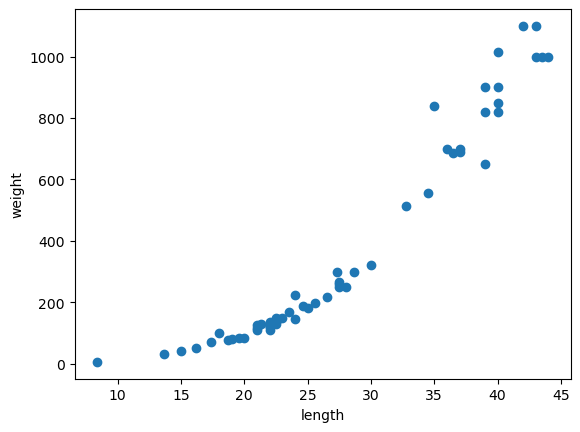

In [44]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight) # perch_weight(target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Training Set 준비

In [45]:
# 임의의 수치 (농어의 무게 측정)
# Scikit-learn 훈련세트는 2차원 배열이여야 함으로, Numpy의 reshape method를 사용해서 2차원으로 봐꿔줌
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [46]:
# test_array의 배열 확인
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [48]:
# test_array의 배열 변경 4 -> 2,2
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [49]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생
# 크기가 봐뀐 새로운 배열 반환시, 지정한 크기가 있는 원본 배열에 있는 원소의 개수가 다르면 error가 발생
# test_array = test_array.reshape(2,3)

In [50]:
train_input = train_input.reshape(-1, 1) # 열이 하나, 남은 차원의 개수는 하나가 된다.
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀 모델 훈련
- 결정계수(R^2)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() # class 객체 할당

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target) # train, target 데이터 전달 & 훈련

knr.score(test_input, test_target) # test_set 점수 확인(정확도)

0.992809406101064

R**2 = 1 - (test_target - test_input)**2 / (test_target - test_target_mean)**2 [결정계수]

예측이 Target의 평균 예측? - R**2는 0에 가까워짐
예측이 Target에 가까워지면? - R**2는 분자가 0에 가까워져서 1에 가까운 값이 됩니다. 

In [52]:
# mean_absolute_error (평균 절대값 오차-이러한 측정 지표들이 sklearn에서 metrics library에 존재)
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # Test_input으로 예측한 값
mae = mean_absolute_error(test_target, test_prediction) # Target & Test_prediction 으로 예측한값
print(mae) # 19g 정도로 차이가 난다.

19.157142857142862


### 과대 & 과소 적합
k최근접 이웃 회귀모델
- train_input, train_target
- test_input, test_target

- train score가 더 높고, test score가 더 낮은것이 일반적.
- 과소적합(Underfitting): test_set score가 training_set 보다 높거나, 두 점수가 모두 너무 낮은 경우
- 과대적합(Overfitting): training_set score가 좋은데, test_set socre에서는 점수가 나쁜경우

In [53]:
knr.score(train_input, train_target)

0.9698823289099254

In [54]:
knr.score(test_input, test_target)

0.992809406101064

### 이웃 개수 줄이기
k-최근접 이웃 알고리즘의 개수 기본값은 5 -> 3으로 줄여서 다시 만들어봄
- 이웃의 개수가 적어지면 (과대 적합), 전체 샘플의 적어지면 가장 가까운 target만 참고: training set에만 잘 맞는 모델이 만들어짐
- 이웃의 개수가 많아지면 (과소 적합), 전체 샘플의 개수로 하면 1개의 값으로 예측 (분류,회귀등): 모델이 단순해짐

In [55]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

0.9804899950518966


In [56]:
print(knr.score(test_input, test_target))

0.9746459963987609


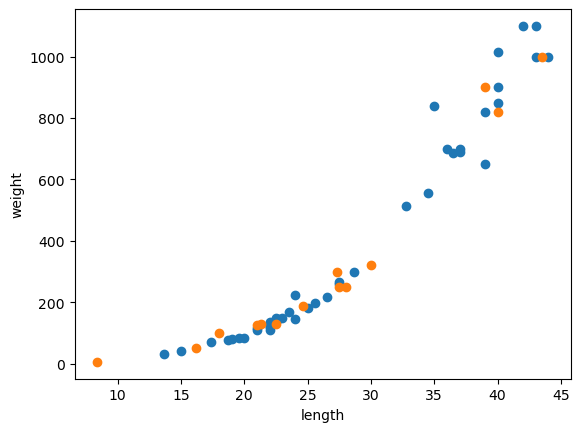

In [57]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()